In [1]:
# %matplotlib ipympl

import numpy as np
from make_bifurcation_diagram import make_bifrucation_diagram, bistable
from calvin_stats.plots import init_2d_fax
from EBM import potential


Finding attractors.



100%|██████████| 10/10 [00:09<00:00,  1.11it/s]


Finding m_states.



100%|██████████| 5/5 [00:02<00:00,  2.07it/s]


/Users/cfn18/Documents/PhD-Work/Thesis/img/L96-EBM//Potential-Well-and-Bifurcation-Diagram.pdf


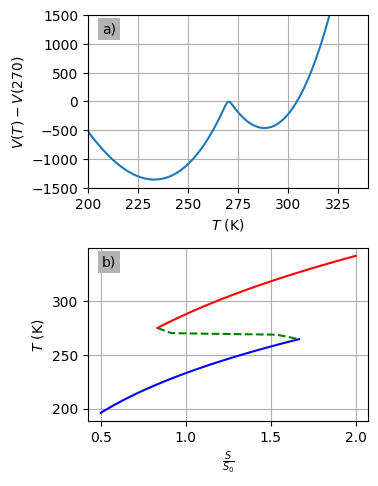

In [7]:
fig, axes = init_2d_fax(nrows=2)

# Plot Double Well
ax = axes[0]
Ts = np.linspace(200, 340, 140)
ax.plot(Ts, potential(Ts) - potential(270))
ax.set_xlim(200, 340)
ax.set_ylim(-1500, 1500)
ax.set_xlabel('$T$ (K)')
ax.set_ylabel('$V(T) - V(270)$')
Ts = np.linspace(200, 340, 30)


# Plot Bifurcation diagram
ax=axes[1]
TSIs = 1367 * np.linspace(0.5, 2, 10)
fig, ax = make_bifrucation_diagram(TSIs, fax=[fig, ax])
ax.set_xlabel("$\\frac{S}{S_{0}}$")
ax.set_ylabel("$T$ (K)")
fig

plot_save_dir = '/Users/cfn18/Documents/PhD-Work/Thesis/img/L96-EBM/'
save_name = plot_save_dir + '/Potential-Well-and-Bifurcation-Diagram.pdf'
fig.tight_layout()
fig.savefig(save_name)
print(save_name)